In [339]:
from math import exp, pi
import numpy as np
from matplotlib import pyplot as plt

In [357]:
#"""Problem 1b"""


c = 3 * 10**8 # m / s
f_high = c / (400 * 10 ** -9)
f_low  =  c / (800 * 10 ** -9)
omega = np.linspace(f_low * 2 * pi, f_high * 2 * pi , 100)

mu_2 = 1
ep_2 = 10
d = 400 * 10**(-9) # m

kz2 = ((omega / c)**2 * ep_2 * mu_2 ).astype('csingle')**(.5)
kz1 = ((omega / c)**2 ).astype('csingle')**(.5)

t12 = (2 * ep_2 * kz1) / (ep_2 * kz1 + kz2)
t21 = (2 * kz2) / ( kz2 + ep_2 * kz1)
r21 = (-kz2 + ep_2 * kz1) / (ep_2 * kz1 + kz2)
ex = np.exp(1j*d*kz2)

t = t12*t21*ex / (1 - r21**2 * ex * ex)

In [353]:
#ex2 = np.exp(1j*d*kz2)
#tr = (2*ep_2*kz1  * 2*kz2) / (ep_2 * kz1 + kz2)**2 * ex2
#br = 1 - ((kz2 - ep_2*kz1)/(ep_2*kz1 + kz2))**2 * ex2 * ex2
#t = tr / br

Text(0.5, 1.0, 'Transmission Intensity vs $\\omega$')

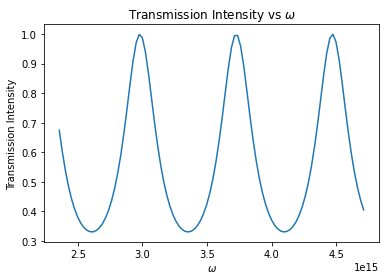

In [360]:
x = c * 2 * pi / omega
plt.plot(omega, np.absolute(t)**2)
plt.ylabel('Transmission Intensity')
plt.xlabel('$\omega$')
plt.title('Transmission Intensity vs $\omega$')

In [343]:
#"""Problem 1c"""


c = 3 * 10**8 # m / s
omega = 2*pi*375000000000000

mu_2 = 1
ep_2 = 1
d = 50 * 10**(-9) # m

k1 = omega / c * (1)**(.5)
k2 = omega / c * (ep_2 * mu_2)**(.5)
k_par = np.linspace(k1*.001, k1*2, 5000)
kz2 = (k2**2 - k_par**2).astype('csingle')**(.5)
kz1 = (k1**2 - k_par**2).astype('csingle')**(.5)

t12 = (2 * ep_2 * kz1) / (ep_2 * kz1 + kz2)
t21 = (2 * kz2) / ( kz2 + ep_2 * kz1)
r21 = (-kz2 + ep_2 * kz1) / (ep_2 * kz1 + kz2)
ex = np.exp(1j*d*kz2)

t = t12*t21*ex / (1 - r21**2 * ex * ex)

Text(0.5, 1.0, 'Transmission Intensity vs Wave Vector')

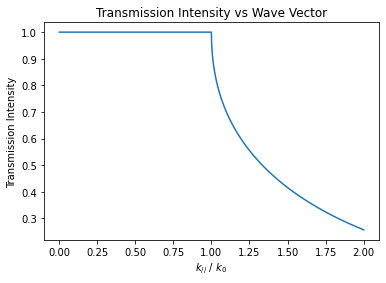

In [344]:
plt.plot((k_par / k1), np.absolute(t)**2)
#plt.ylim([.999999, 1.000001])
plt.ylabel('Transmission Intensity')
plt.xlabel('$k_{//}$ / $k_{0}$')
plt.title('Transmission Intensity vs Wave Vector')

In [359]:
plt.plot((k_par / k1),np.arctan(t.imag/t.real))
plt.ylabel('arg(t)')
plt.xlabel('$k_{//}$ / $k_{0}$')
plt.title('arg(t) vs Wave Vector')

ValueError: x and y must have same first dimension, but have shapes (5000,) and (100,)

In [346]:
#Problem 1e

t = np.exp(-1j*d*kz1)

Text(0.5, 1.0, 'Transmission Intensity vs Wave Vector')

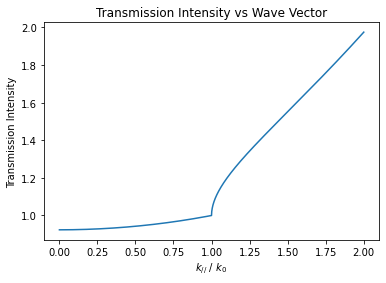

In [347]:
plt.plot((k_par / k1), t)
#plt.ylim([.999999, 1.000001])
plt.ylabel('Transmission Intensity')
plt.xlabel('$k_{//}$ / $k_{0}$')
plt.title('Transmission Intensity vs Wave Vector')

Text(0.5, 1.0, 'arg(t) vs Wave Vector')

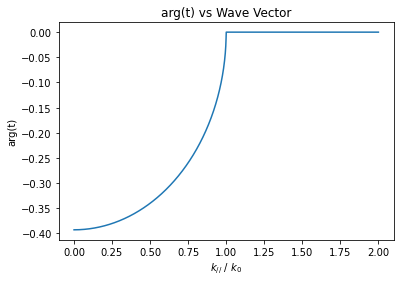

In [348]:
plt.plot((k_par / k1),np.arctan(t.imag/t.real))
plt.ylabel('arg(t)')
plt.xlabel('$k_{//}$ / $k_{0}$')
plt.title('arg(t) vs Wave Vector')

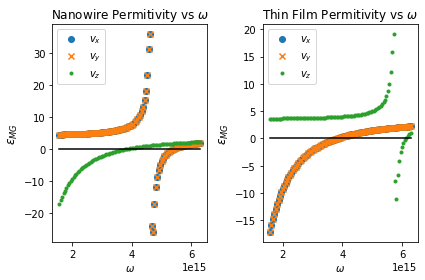

In [403]:
# Problem 2 is written with Python 3

from math import exp, pi
import numpy as np
from matplotlib import pyplot as plt

# Ag / AAO Nanowire Array : http://dx.doi.org/10.1016/j.optcom.2013.02.017
f = 0.227   # Filling fraction

c = 3 * 10**8                           # m / s
w_low = 2 * pi * c / (1200 * 10 ** -9)  # Low end of freq
w_high = 2 * pi * c / (300 * 10 ** -9)    # High end of freq
w = np.linspace(w_low, w_high, 100)    # Frequency parameter
w_p = 1.5 * 10 ** 16                    # Silver plasma frequency
gamma = 7.73 * 10**13                   # Dampening const
e_inf = 6                               # High freq permittivity

e_i = e_inf - w_p **2 / (w ** 2 + gamma * w * 1j)   # Inclusion permittivity
e_h = 2.789                                         # Host permittivity

def permittivity_mg(depol):
    e_frac = (e_i - e_h) / (e_h + depol*(e_i - e_h))
    e_mg = e_h * (1 + (1 - depol) * f * e_frac) / (1 - depol * f * e_frac)
    return e_mg

# Nanowire array
vx = 1/2    # elipsoid depolarization, x
vy = 1/2    # elipsoid depolarization, y
vz = 0      # elipsoid depolarization, z

e_mgx = permittivity_mg(vx)
e_mgy = permittivity_mg(vy)
e_mgz = permittivity_mg(vz)

plt.subplot(1, 2, 1)
plt.scatter(w, e_mgx, marker="o")
plt.scatter(w, e_mgy, marker="x")
plt.scatter(w, e_mgz, marker=".") 
plt.legend(['$v_x$', '$v_y$','$v_z$'], loc='upper left')

plt.plot(w, 0*w, color='k')

plt.ylabel('$\epsilon_{MG}$', fontsize=12)
plt.xlabel('$\omega$')
plt.title('Nanowire Permitivity vs $\omega$')

# Thin Film
vx = 0    # elipsoid depolarization, x
vy = 0    # elipsoid depolarization, y
vz = 1    # elipsoid depolarization, z

e_mgx = permittivity_mg(vx)
e_mgy = permittivity_mg(vy)
e_mgz = permittivity_mg(vz)

plt.subplot(1, 2, 2)
plt.scatter(w, e_mgx, marker="o")
plt.scatter(w, e_mgy, marker="x")
plt.scatter(w, e_mgz, marker=".") 
plt.legend(['$v_x$', '$v_y$','$v_z$'], loc='upper left')

plt.plot(w, 0*w, color='k')

plt.ylabel('$\epsilon_{MG}$', fontsize=12)
plt.xlabel('$\omega$')
plt.title('Thin Film Permitivity vs $\omega$')

plt.tight_layout()